# TechX 2020 计算社科预习 Quiz 3 V1.0

这个测试的目的不是为了难倒大家，而是为了检验预习成果，方便我们调整接下来的预习和课程安排。同时，我们也希望你们能通过这几个练习学到的知识，并学到的coding技巧。因此，我们有如下要求：
1. 虽然我们不允许大家向别人请教 quiz 中的问题，但是你们可以在互联网上搜索已有的资源：这也是在TechX的学习过程中大家会一直做的。（PS 请别直接抄代码！请理解之后自己实现）
2. 有些题目里会给出一些变量/数据，但是我们批改的时候可能会改动它们以检测你程序的可拓展性。
3. 请在北京时间 8.2 24:00之前在教学立方提交，如有事无法按时请私信自己的对应AL（在预习文档里 https://shimo.im/docs/eIy4MXRYkLoZvE2Z ）。
4. 如果感觉题目有问题或表述不清请直接在群里提出。我们有可能根据大家的提问发布V2.0 的 Quiz。

## 0. Setup

请在下面导入numpy(用np代替)，pandas（用pd代替）, 以及 matplotlib的相关包

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-white")

# 1. Plotting
下面所有的图都需要有以下元素：
1. 标题
2. 坐标轴的annotation
3. 相关 legends

a. 用pandas导入 Data Science Handbook notebooks/data/中的 state-population.csv 文件，把它命名为df 

(Score: 2/2)

In [10]:
df = pd.read_csv("state-population.csv")
df.iloc[0]

state/region             AL
ages                under18
year                   2012
population      1.11749e+06
Name: 0, dtype: object

b. 在df的时间范围里，请选择合适的数据图展示 California 与 Texas 的总人口变化，并用你喜欢的颜色区分他们两个。

(Socre: 1/2)

In [29]:
x = np.linspace(1990, 2013, 24)
y = df[df["state/region"] == 'CA']
y = y[y['ages'] == 'total']
b = df[df["state/region"] == 'TX']
b = b[b['ages'] == 'total']
                                    # dataframe is not sorted (by year)

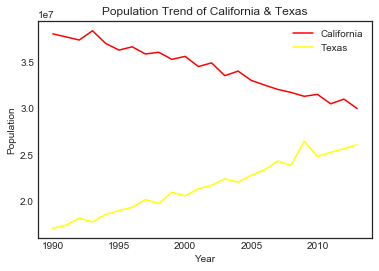

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y['population'], color = 'red', label = "California")
ax.plot(x, b['population'], color = 'yellow', label = "Texas")
ax.legend(frameon = False)
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Population Trend of California & Texas");

c. 选用合适的bin number来展示 2010 年美国各州的18岁以下人口的频率直方图(histogram)。

(Score: 1/2)

In [35]:
under18_pop = df[df['ages'] == 'under18']
under18_pop = under18_pop[under18_pop['year'] == 2010]
total_pop = df[df['ages'] == 'total']
total_pop = total_pop[total_pop['year'] == 2010]
ratio = np.divide(np.array(under18_pop['population']), np.array(total_pop['population']))

                # 这里其实直接把usa的数据给去掉，然后用hist来画出所有州under18的population就好。纵轴是频数（和频率可以互相转换），
                # 横轴是人口数量的一些区间。

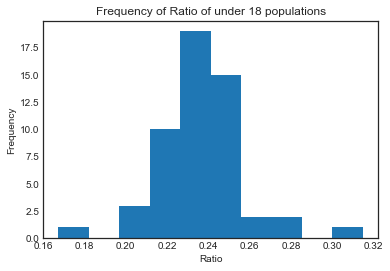

In [36]:
fig, ax = plt.subplots()
ax.hist(ratio)
ax.set_title("Frequency of Ratio of under 18 populations")
ax.set_xlabel("Ratio")
ax.set_ylabel("Frequency");

d. 用scatter plot展示2005-2010美国各州平均总人口与平均增长率的关系（请注意平均增长率的计算方式）。
描述有哪些州比较特殊，根据你的知识分析这些州特殊的原因。

(Socre: 1/2)

In [38]:
# 增长率的计算方法：
# (1+rate)*(popultion of this year) = (population of the next year)
# => average rate of 5 years := rate_5; (1+rate_5)^5*(population of 2005) = (population of 2010)
# => rate_5 can be computed.

average_growth_rate_pa = []
five_year_pop = df[df['ages'] == 'total']
five_year_pop = five_year_pop[five_year_pop['year'] >= 2004]
five_year_pop = five_year_pop[five_year_pop['year'] <= 2010]
state_mean =  pd.DataFrame(np.array(five_year_pop['population']), index = [five_year_pop['state/region'], five_year_pop['year']]).drop('USA', level = 0)
state_mean.columns = ['population']
state_mean = state_mean.sort_index()

for i in range(1, len(state_mean)):
    if state_mean.index[i][1] != 2004:
        x = state_mean.iloc[i, 0]
        y = state_mean.iloc[i - 1, 0]
        average_growth_rate_pa.append(x/y - 1)
state_mean = state_mean.drop(index = 2004, level = 1)
state_mean['Average_Grouth_rate_PA'] = average_growth_rate_pa   
state_mean

population  Average_Grouth_rate_PA
state/region year                                    
AK           2005    666946.0                0.011619
             2006    675302.0                0.012529
             2007    680300.0                0.007401
             2008    687455.0                0.010517
             2009    698895.0                0.016641
             2010    713868.0                0.021424
AL           2005   4569805.0                0.008625
             2006   4628981.0                0.012949
             2007   4672840.0                0.009475
             2008   4718206.0                0.009708
             2009   4757938.0                0.008421
             2010   4785570.0                0.005808
AR           2005   2781097.0                0.011423
             2006   2821761.0                0.014622
             2007   2848650.0                0.009529
             2008   2874554.0                0.009093
             2009   2896843.0                0.007754
             2010   2922280.0                0.008781
AZ           2005   5839077.0                0.033025
             2006   6029141.0                0.032550
             2007   6167681.0                0.022978
             2008   6280362.0                0.018270
             2009   6343154.0                0.009998
             2010   6408790.0                0.010348
CA           2005  35827943.0                0.007122
             2006  36021202.0                0.005394
             2007  36250311.0                0.006360
             2008  36604337.0                0.009766
             2009  36961229.0                0.009750
             2010  37333601.0                0.010075
...                       ...                     ...
VT           2005    621215.0                0.002089
             2006    622892.0                0.002700
             2007    623481.0                0.000946
             2008    624151.0                0.001075
             2009    624817.0                0.001067
             2010    625793.0                0.001562
WA           2005   6257305.0                0.012731
             2006   6370753.0                0.018130
             2007   6461587.0                0.014258
             2008   6562231.0                0.015576
             2009   6667426.0                0.016030
             2010   6742256.0                0.011223
WI           2005   5546166.0                0.005829
             2006   5577655.0                0.005678
             2007   5610775.0                0.005938
             2008   5640996.0                0.005386
             2009   5669264.0                0.005011
             2010   5689060.0                0.003492
WV           2005   1820492.0                0.002232
             2006   1827912.0                0.004076
             2007   1834052.0                0.003359
             2008   1840310.0                0.003412
             2009   1847775.0                0.004056
             2010   1854146.0                0.003448
WY           2005    514157.0                0.009921
             2006    522667.0                0.016551
             2007    534876.0                0.023359
             2008    546043.0                0.020878
             2009    559851.0                0.025287
             2010    564222.0                0.007807

[312 rows x 2 columns]

/Users/stevenchan/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


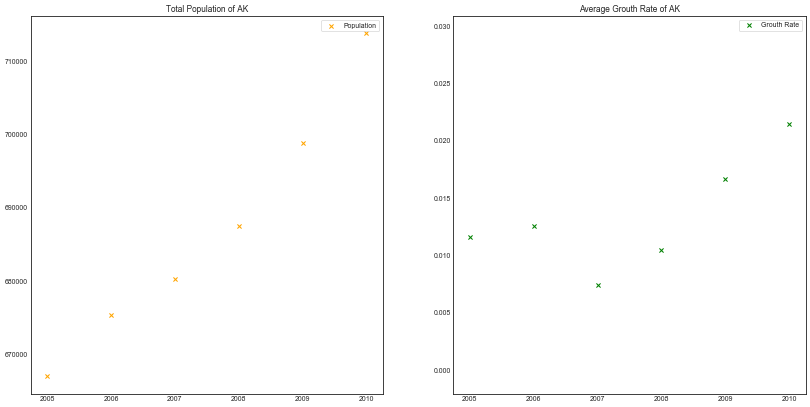

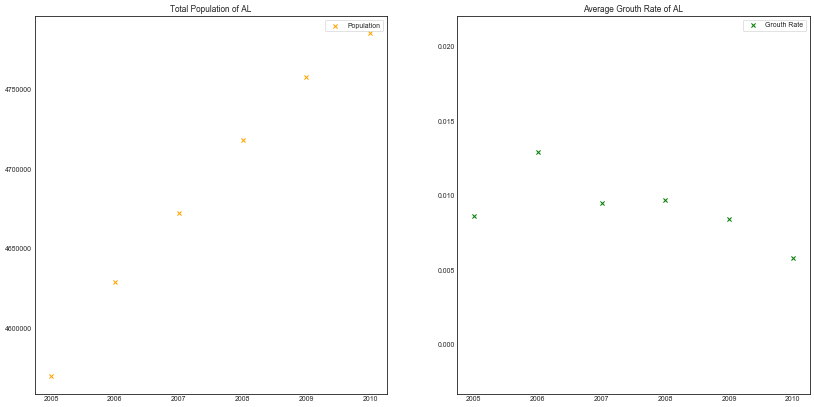

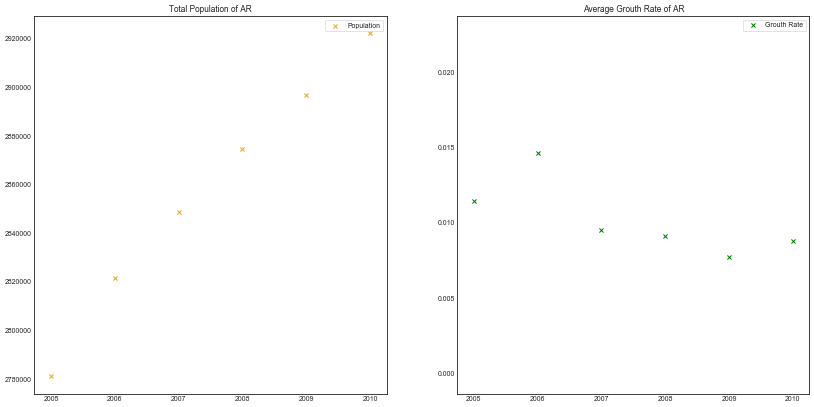

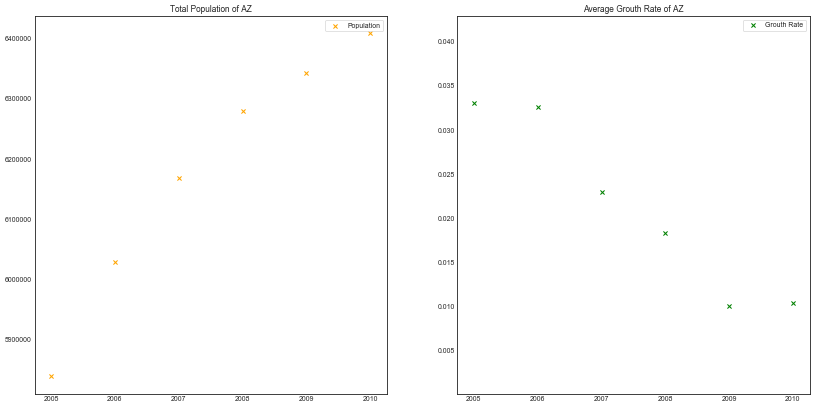

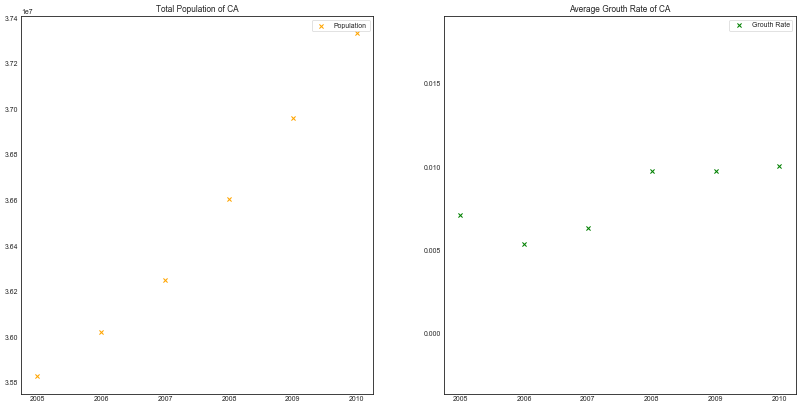

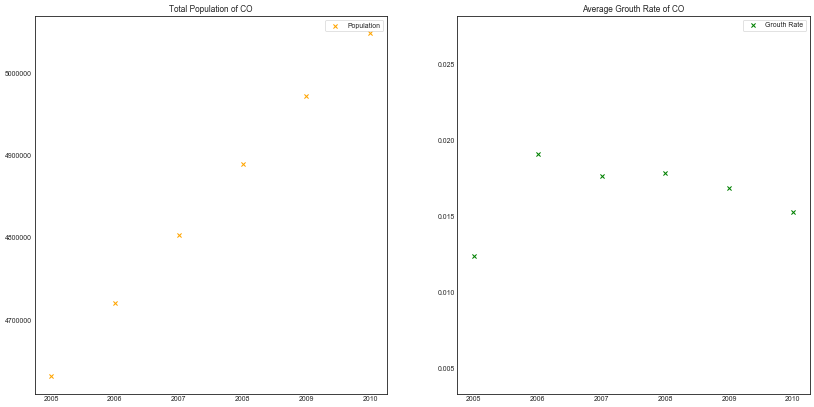

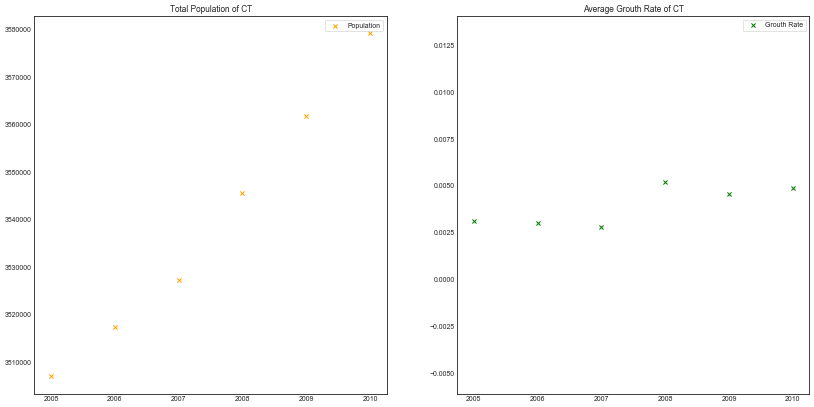

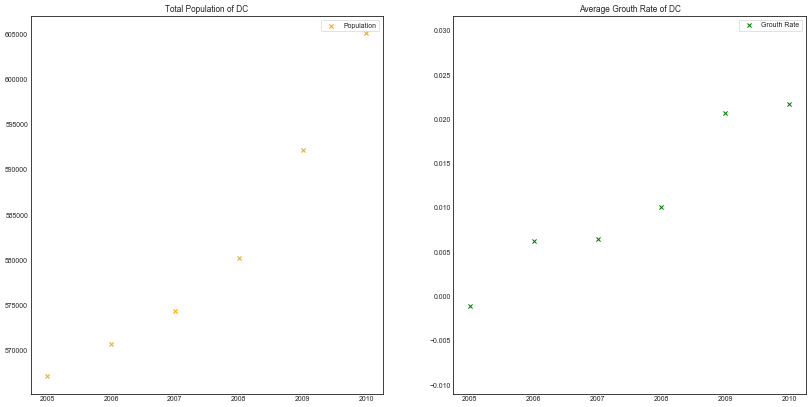

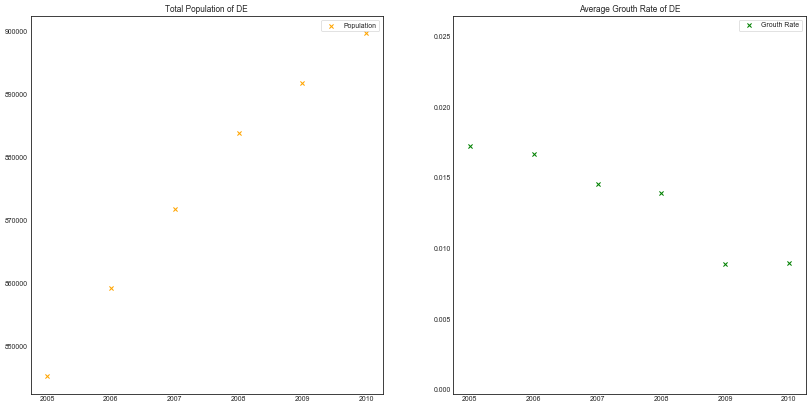

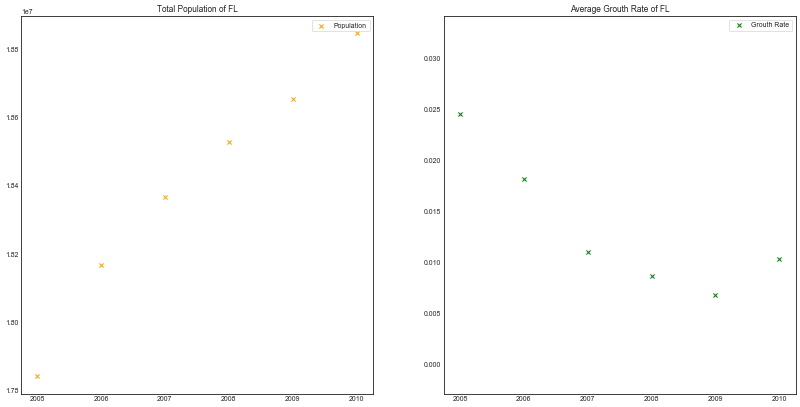

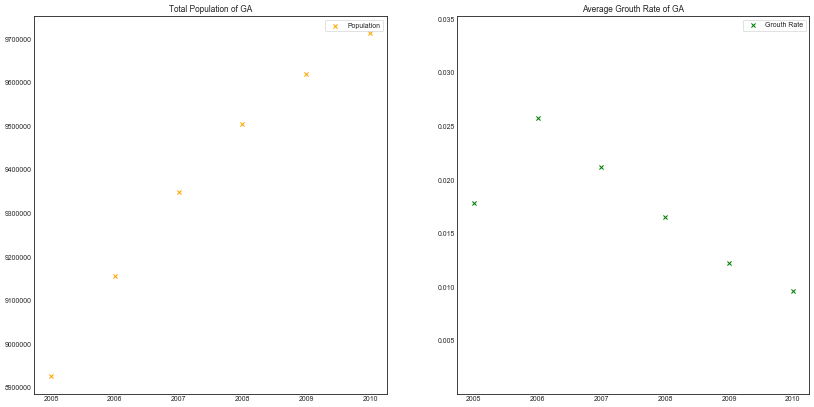

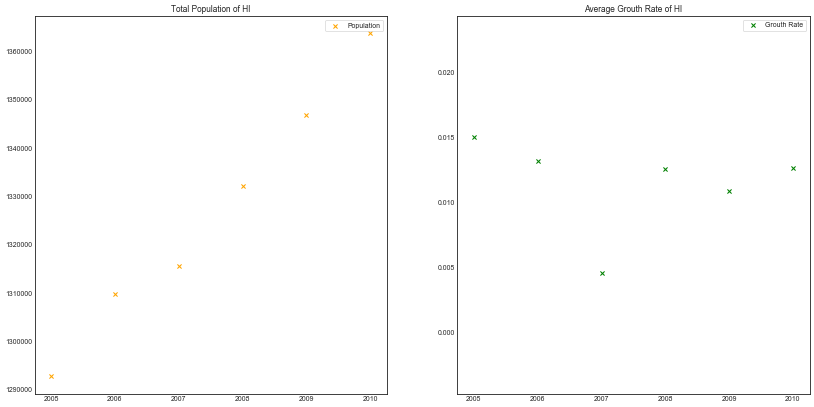

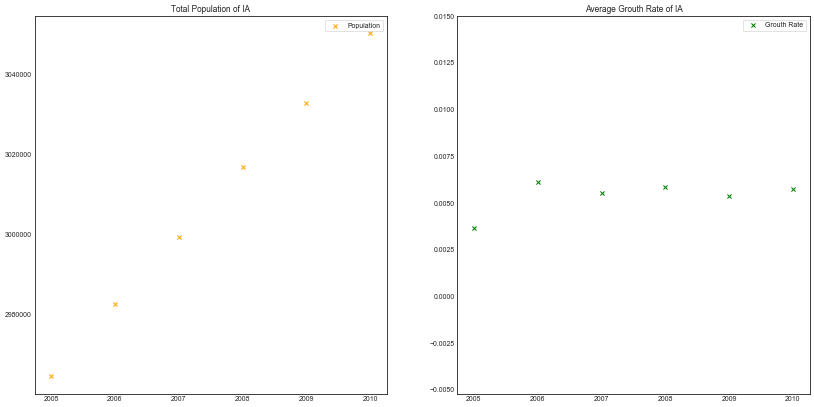

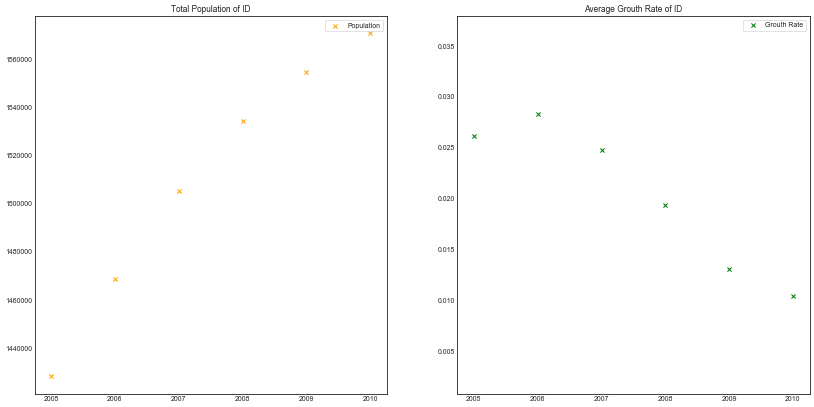

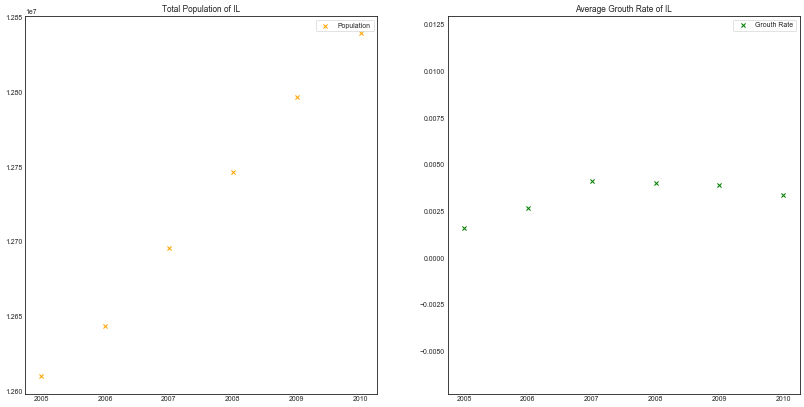

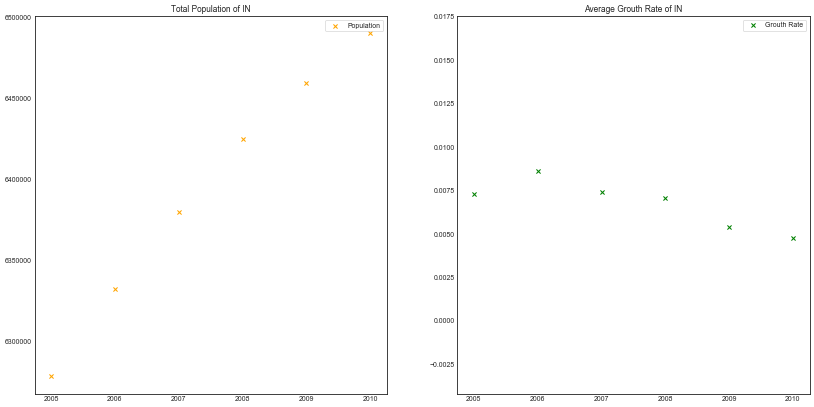

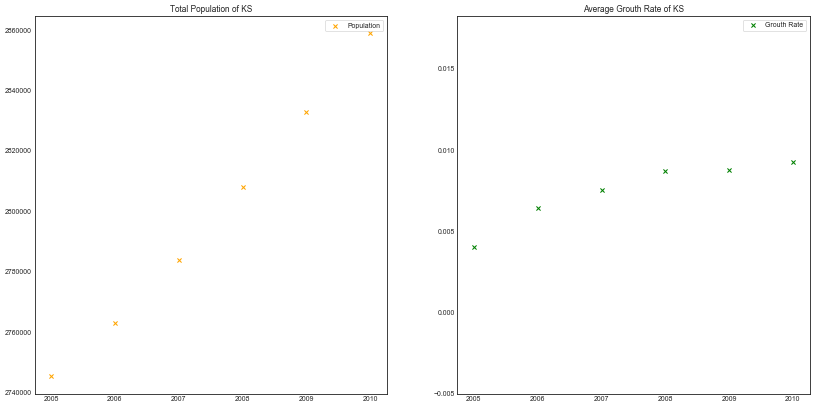

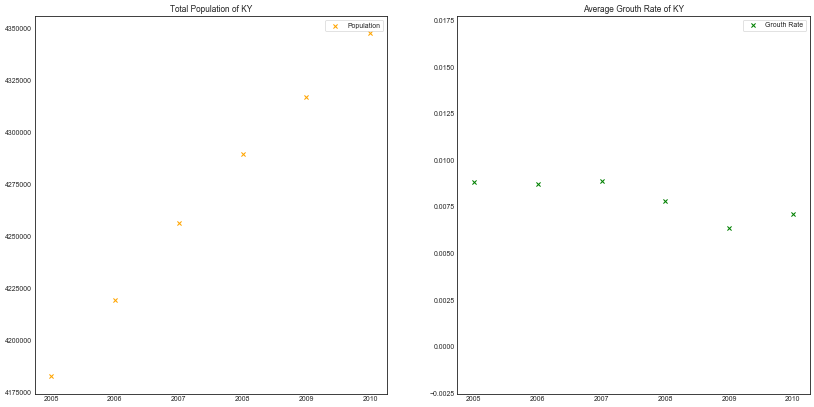

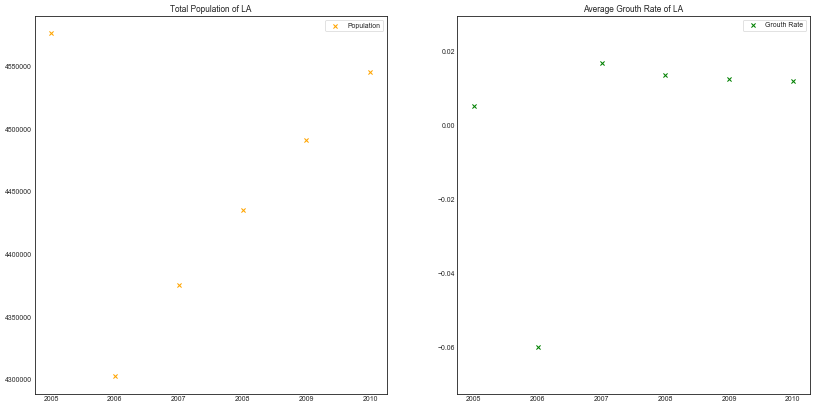

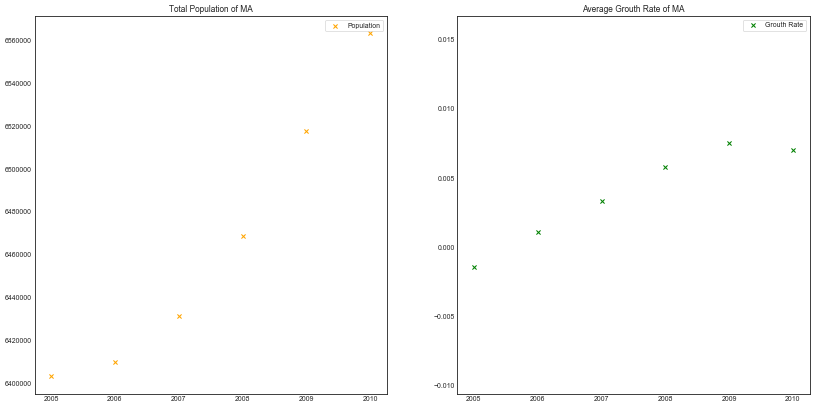

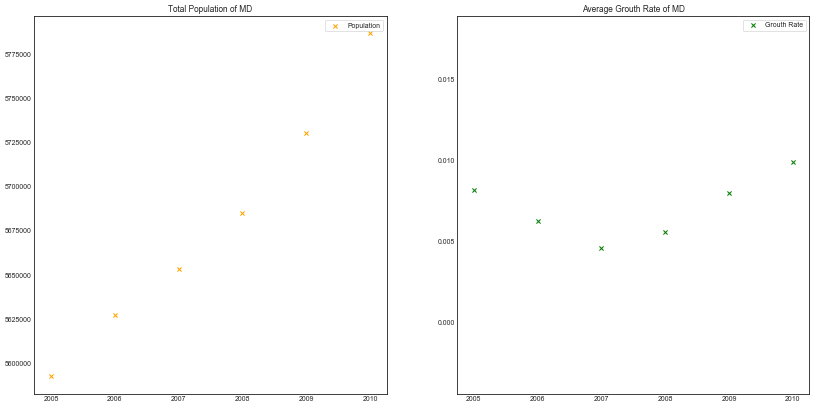

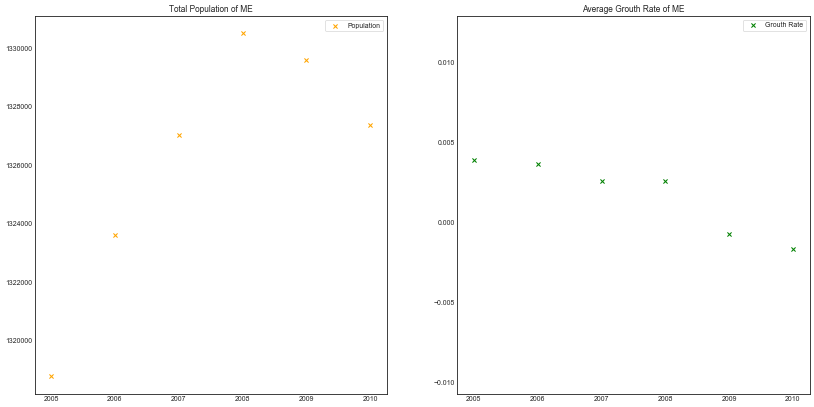

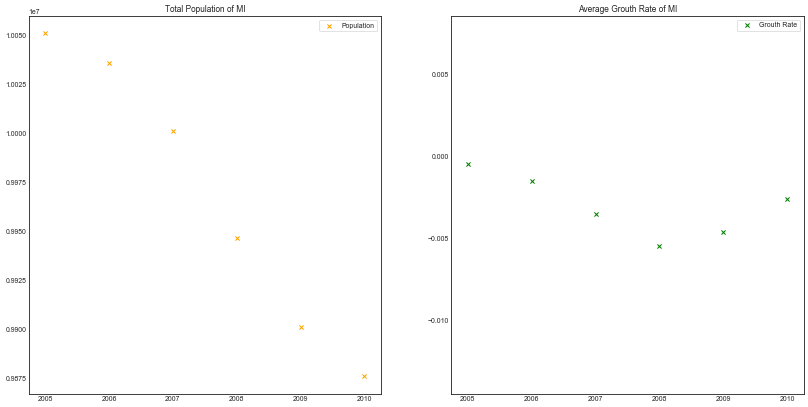

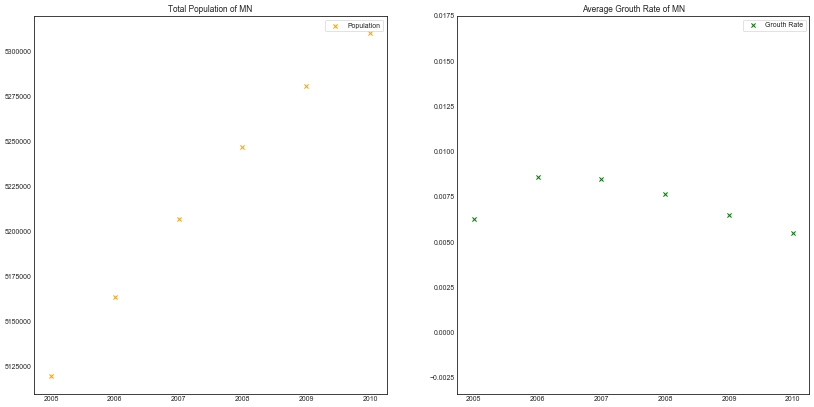

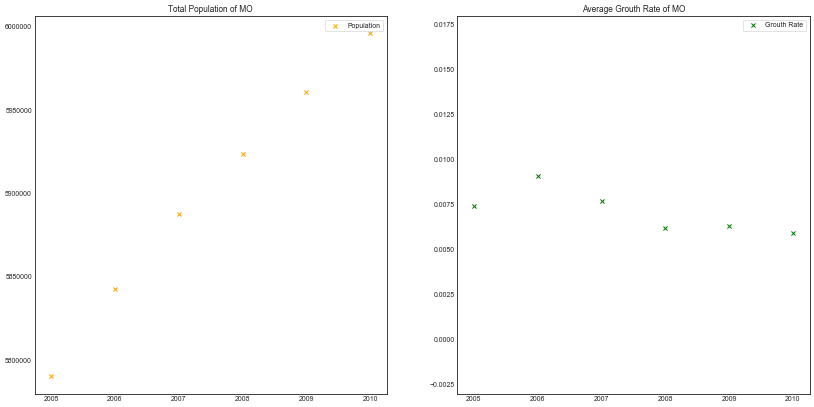

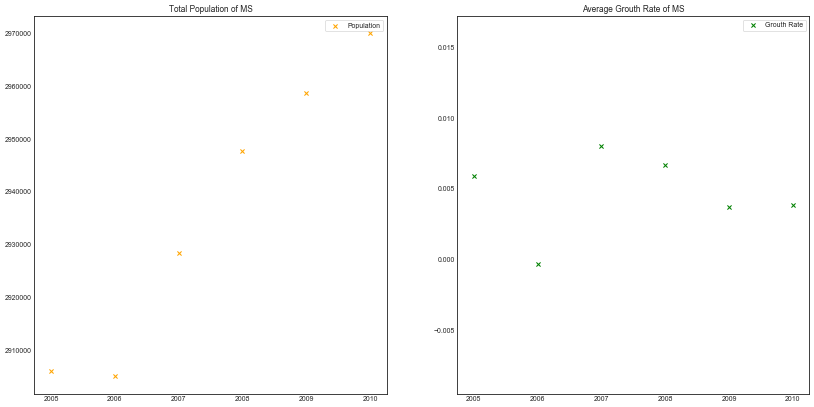

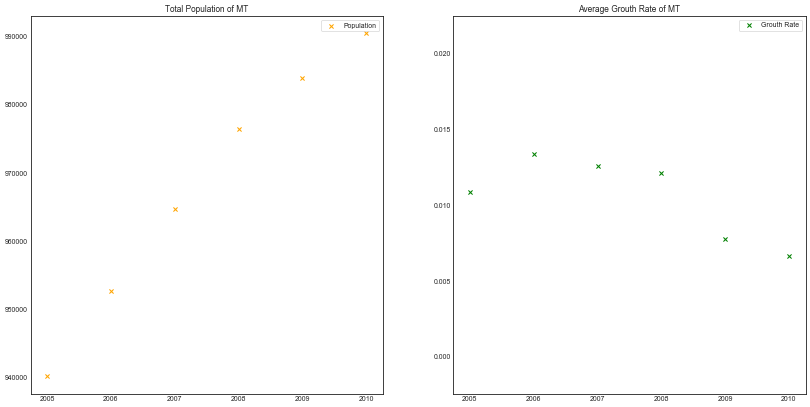

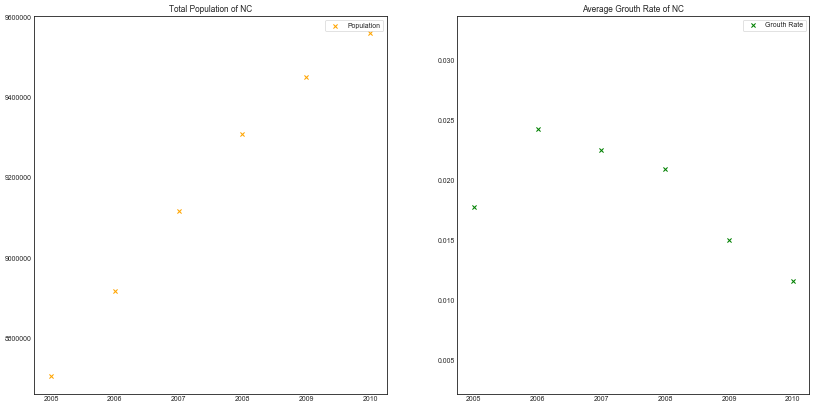

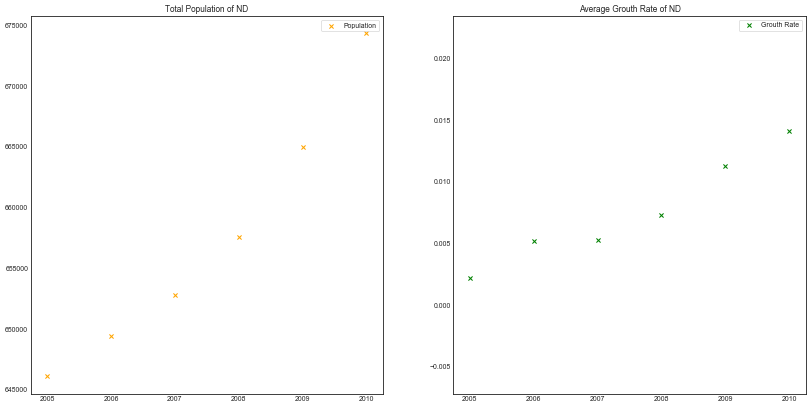

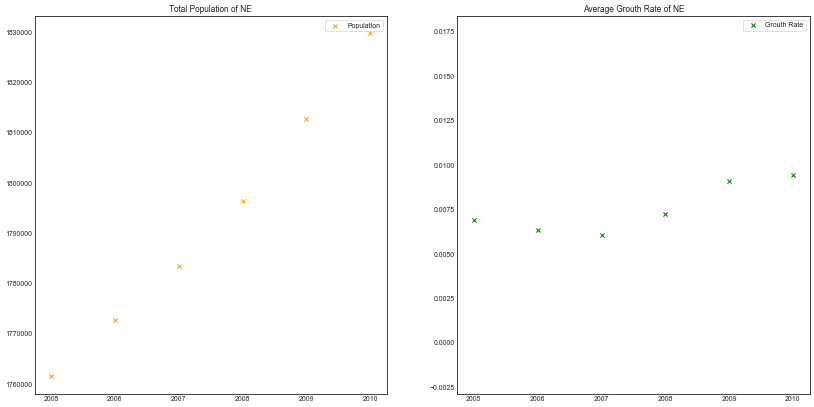

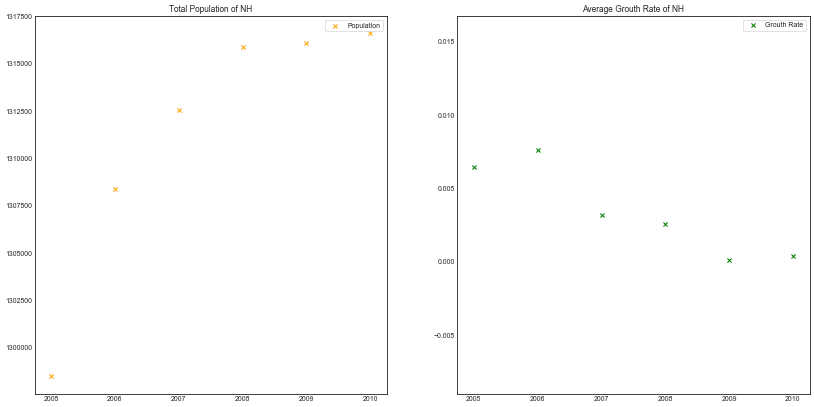

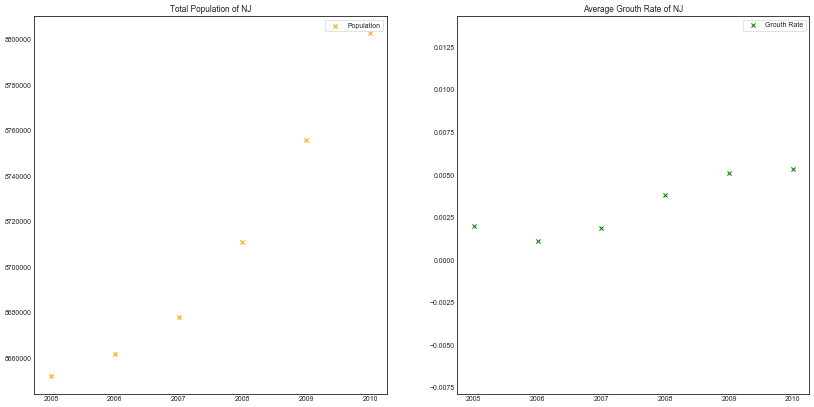

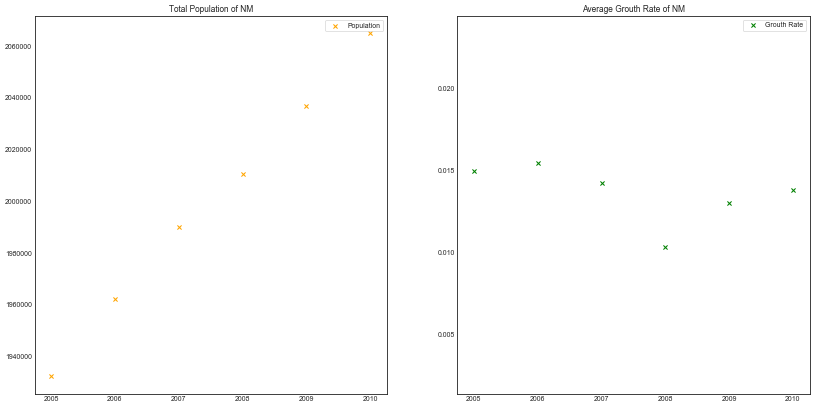

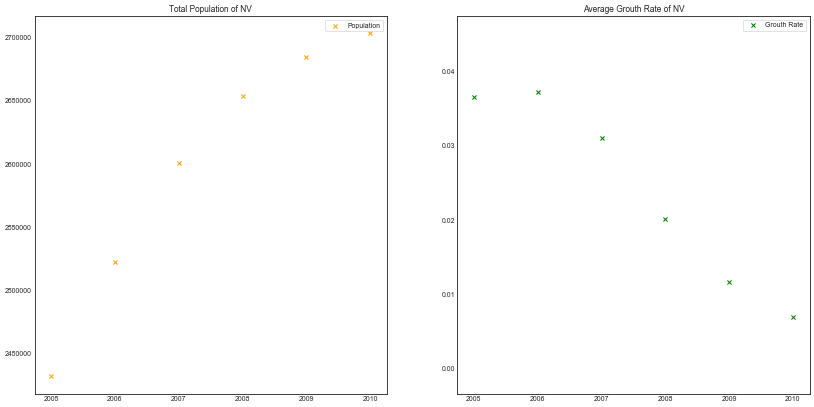

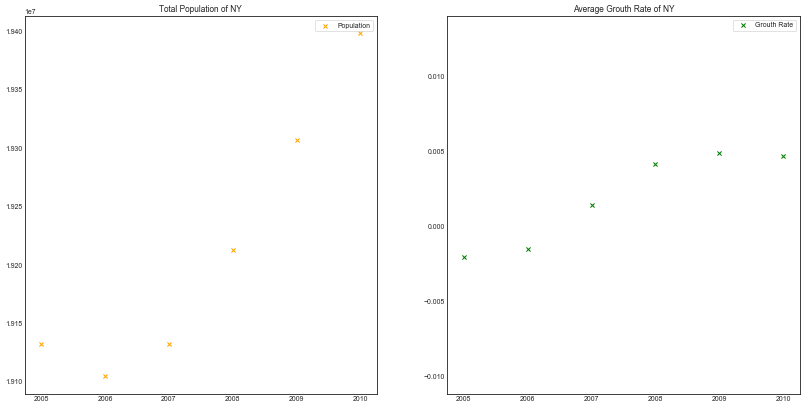

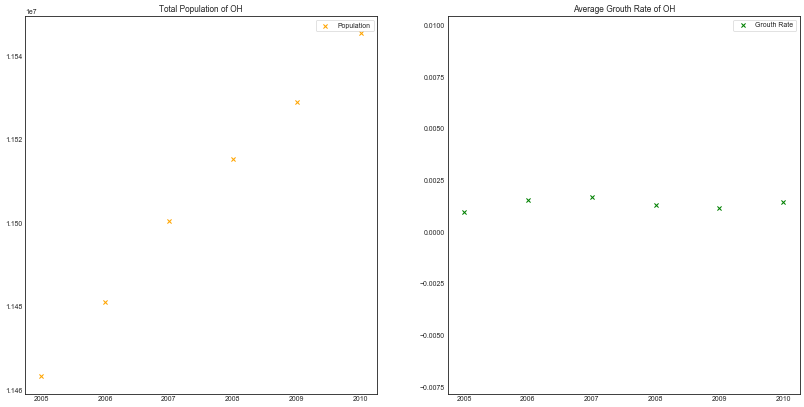

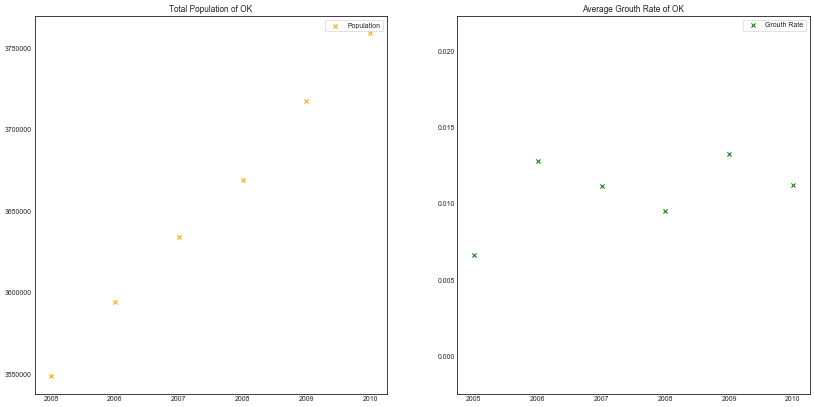

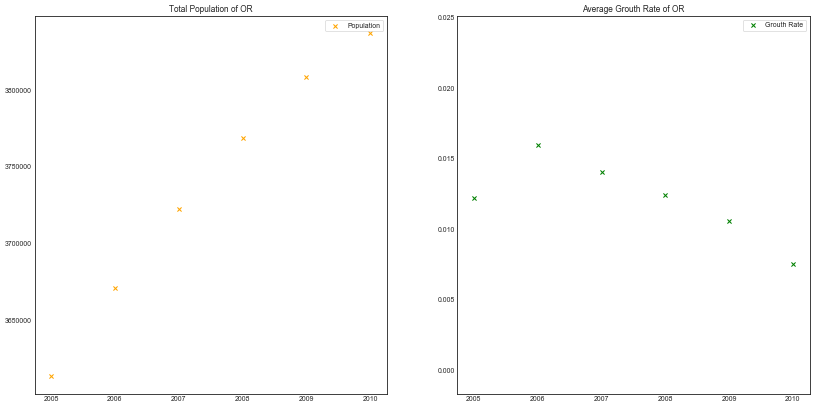

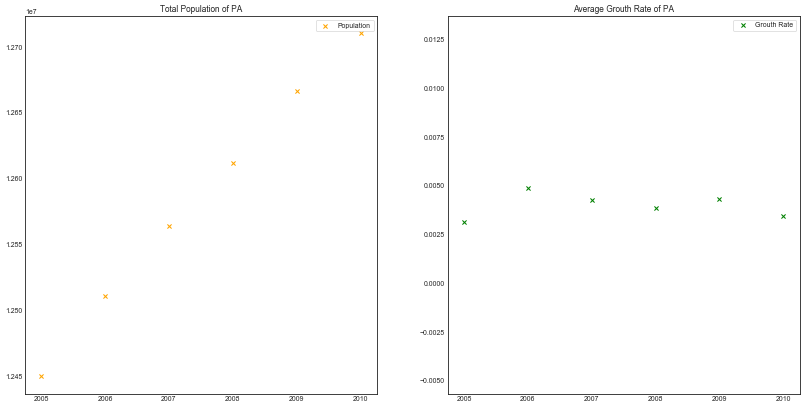

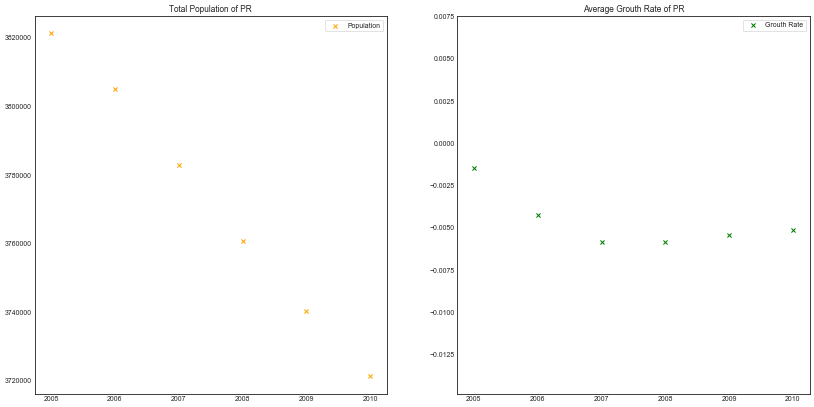

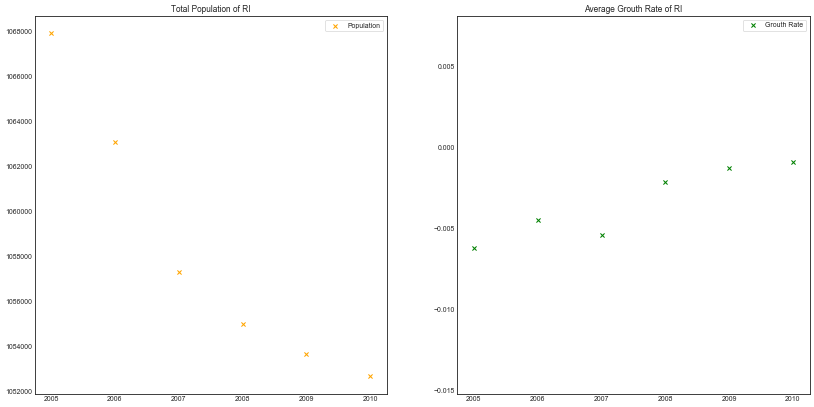

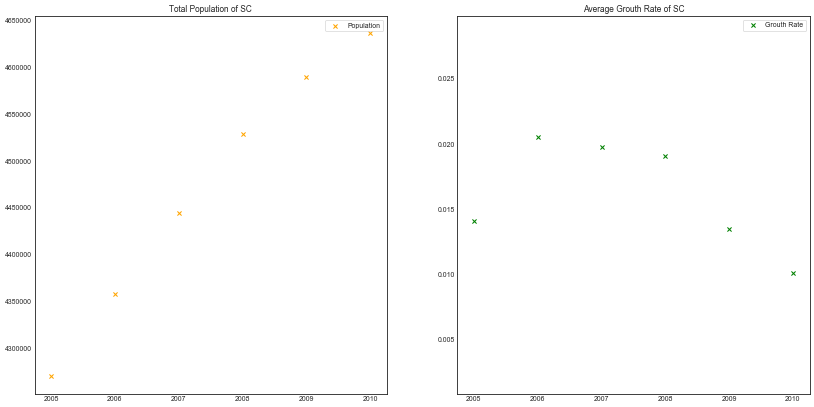

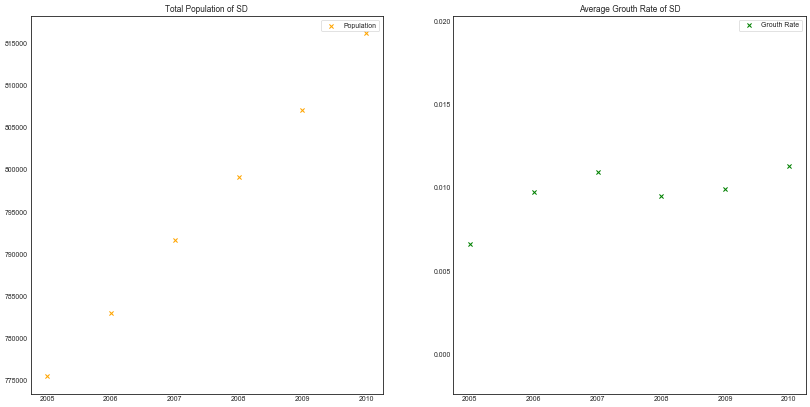

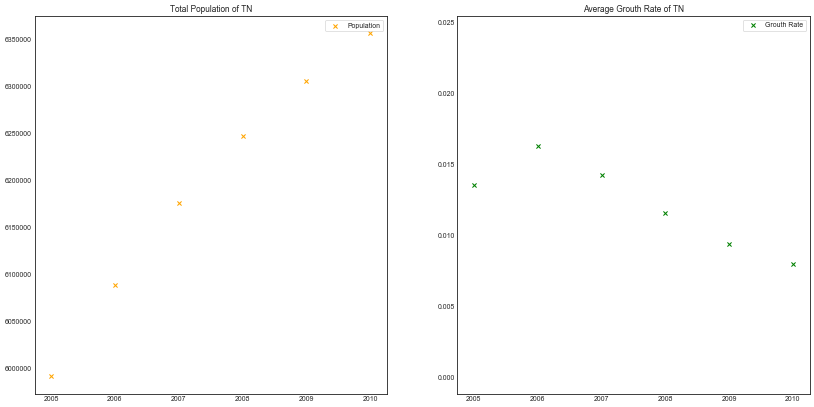

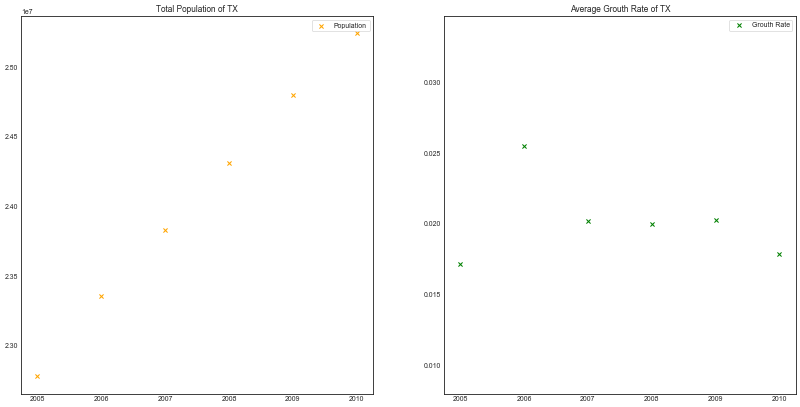

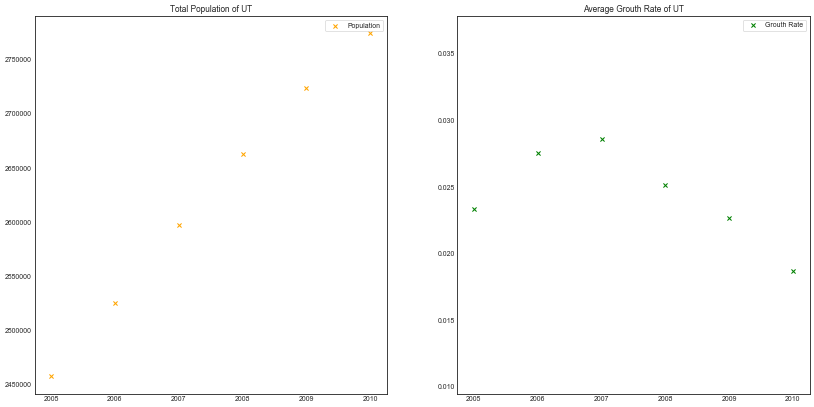

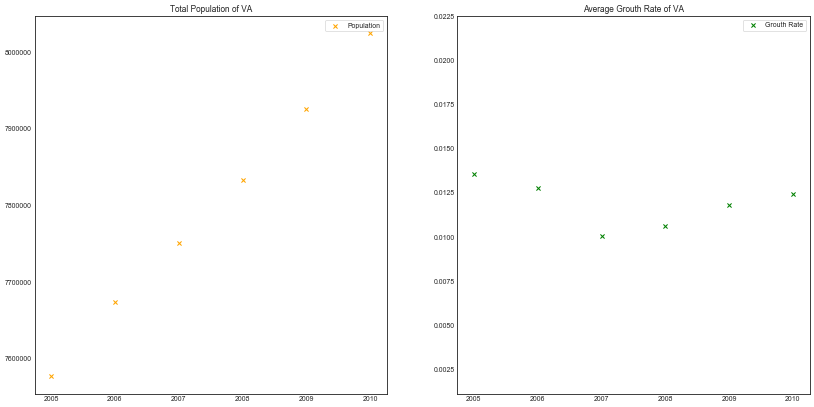

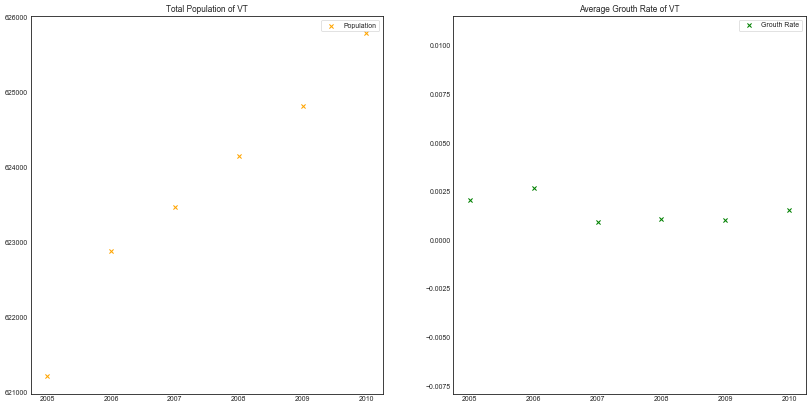

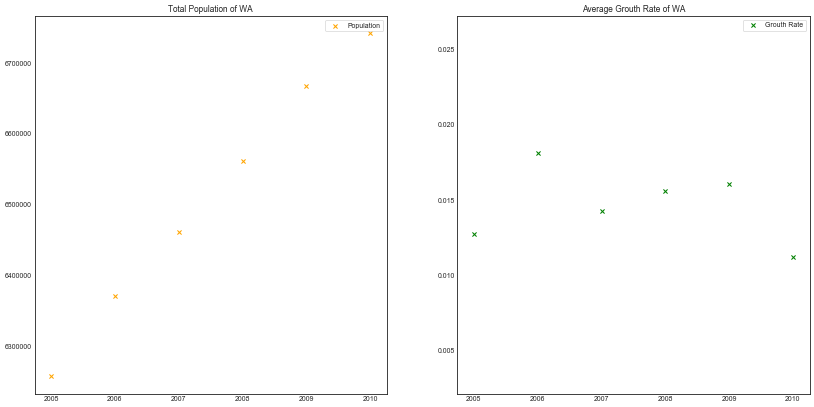

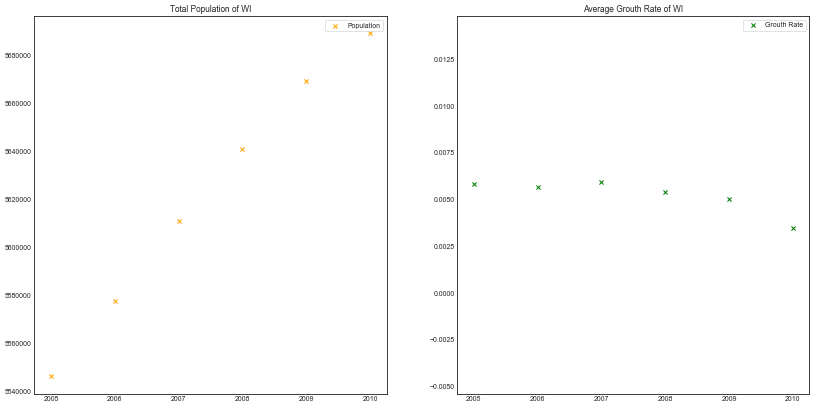

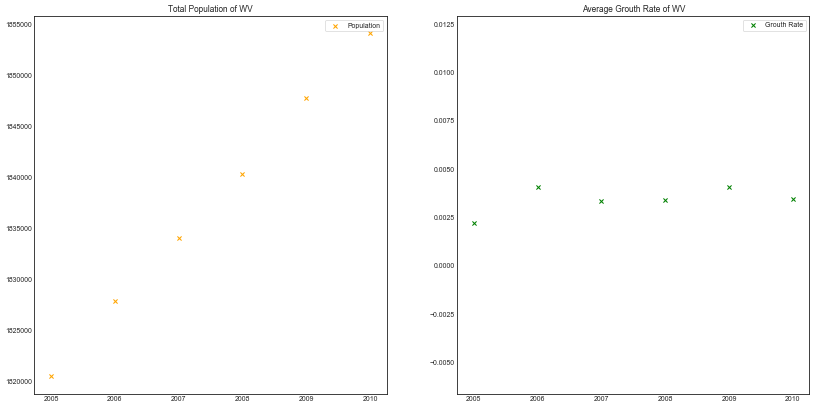

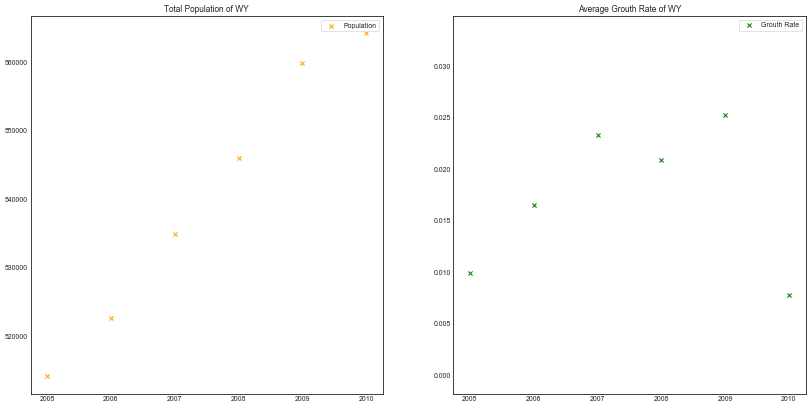

In [39]:
for i in range(0, len(state_mean), 6):
    plt.figure(figsize = (20, 10), dpi = 50)
    x = np.linspace(2005, 2010, 6)
    temp1 = []
    temp2 = []
    for j in range(i, i+6):
        temp1.append(state_mean.iloc[j, 0])
        temp2.append(state_mean.iloc[j, 1])
    plt.subplot(1 , 2, 1)
    plt.scatter(x, temp1, color = 'orange', label = 'Population', marker = "x")
    plt.title("Total Population of " + state_mean.index[i][0])
    plt.legend(frameon = True)
    plt.subplot(1, 2, 2)
    plt.scatter(x, temp2, color = 'green', label = 'Grouth Rate', marker = 'x')
    plt.title("Average Grouth Rate of " + state_mean.index[i][0])
    plt.legend(frameon = True)
        



In [40]:
#我觉得我理解错题目了

# 2. 数学

a. 请在一个x-y坐标系内画出 $y = 2x^2+1$ 的图像，并说明在x=1的时候，此函数的导数的值以及它的几何意义。请在同一个坐标系里画出在x=1时该方程的切线。

(Socre: 2/2)

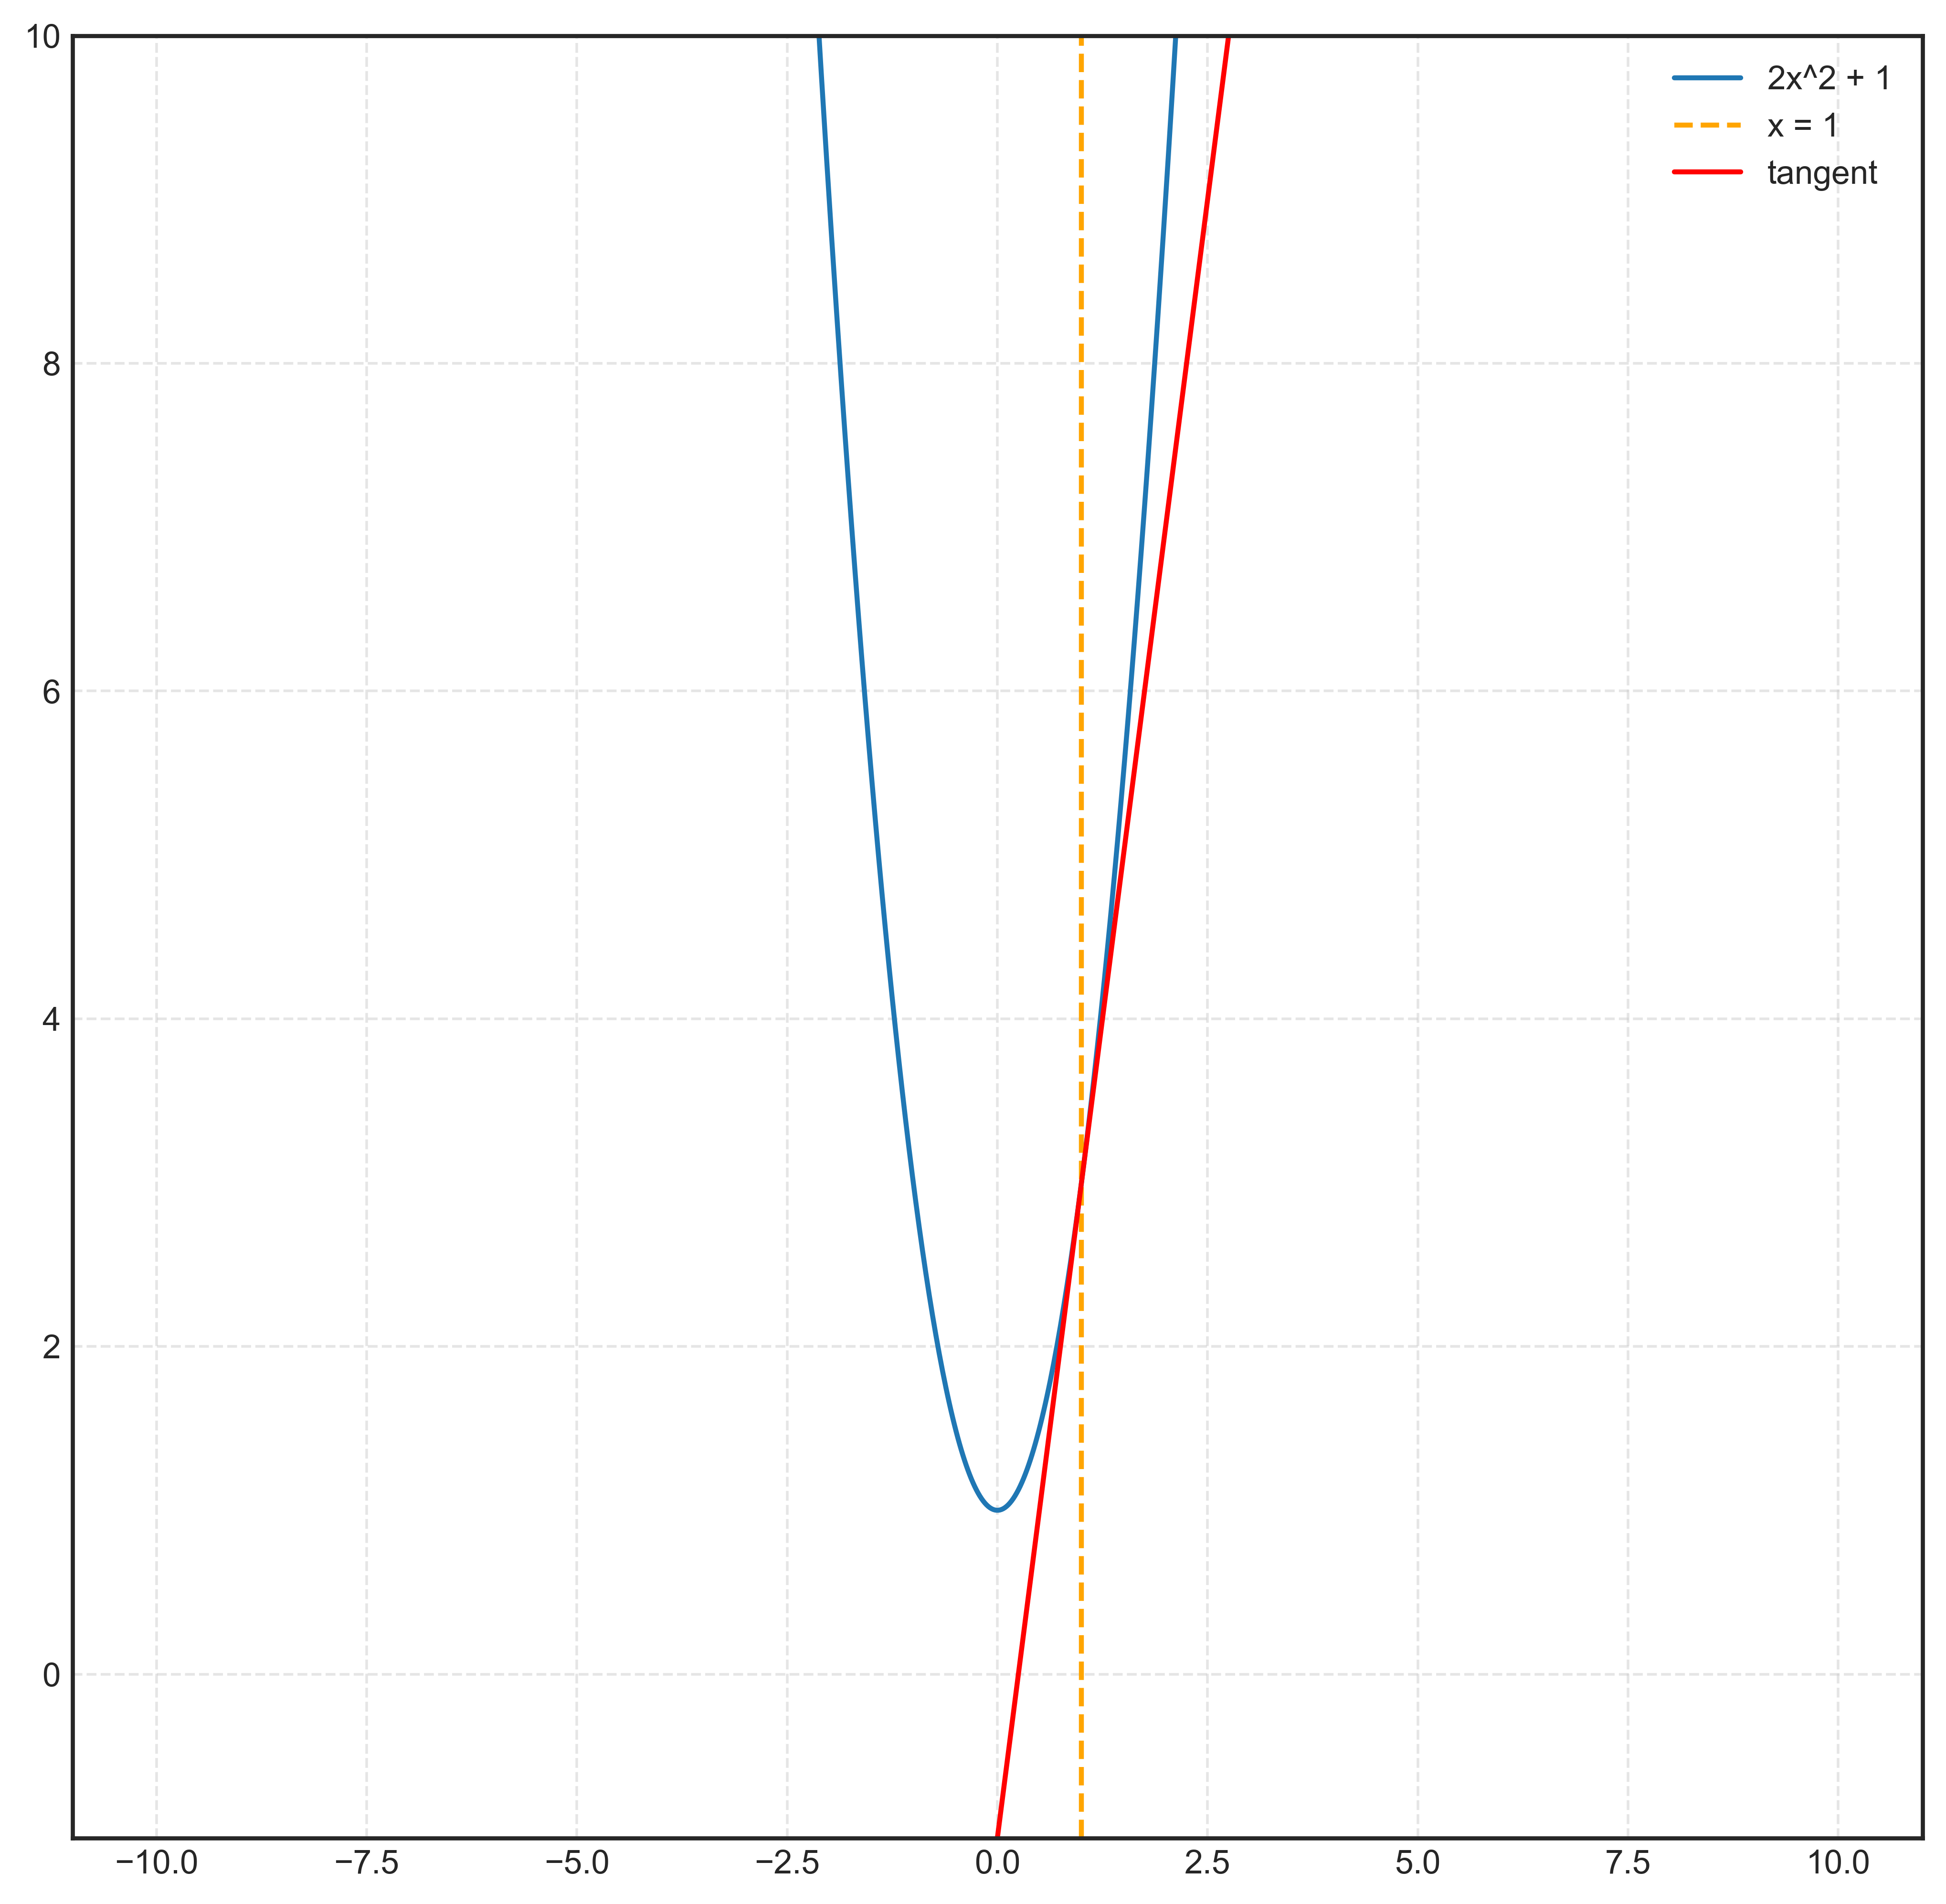

In [41]:
plt.figure(figsize = (10, 10), dpi =500)
x = np.linspace(-10, 10, 1000)
plt.plot(x, x**2*2+1, label = "2x^2 + 1")
plt.grid(linestyle = "--", alpha = 0.5)
plt.axvline(x = 1, linestyle = "--", color = 'orange', label = "x = 1")
plt.ylim(-1, 10)
#当x=1的时候，导数为4x, 值为4，几何意义为在某一点y对应x的变化率。
plt.plot(x, 4*x - 1, color = "red", label = "tangent")
plt.legend()
plt.show()

b. 请用 04.04 中的方法，画出函数 $z = x^2 + y^2$ 在 $|x|\leq 3, |y| \leq 3$内的contour plot (用颜色体现z的大小)。根据你的理解，分别解释此函数 $x=0, y=0$ 以及 $x = 1, y = 0$ 两个点的时候 gradient(梯度) 的大小以及方向。 

(Socre: 2/2)

c. 用自选方法计算下面矩阵乘法的结果（推荐手算）：

i. $$
\begin{pmatrix}
0 & 4 & 3
\end{pmatrix}
\begin{pmatrix}
9 \\
0 \\
3
\end{pmatrix}
$$

ii.
$$
\begin{pmatrix}
9 \\
0 \\
3
\end{pmatrix}
\begin{pmatrix}
0 & 4 & 3
\end{pmatrix}
$$

iii. 
$$
\begin{pmatrix}
9 & 3 \\
0 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
0 & 4 & 3 \\
0 & 4 & 3
\end{pmatrix}
$$

Text(-0.4, -0.5, 'origin')

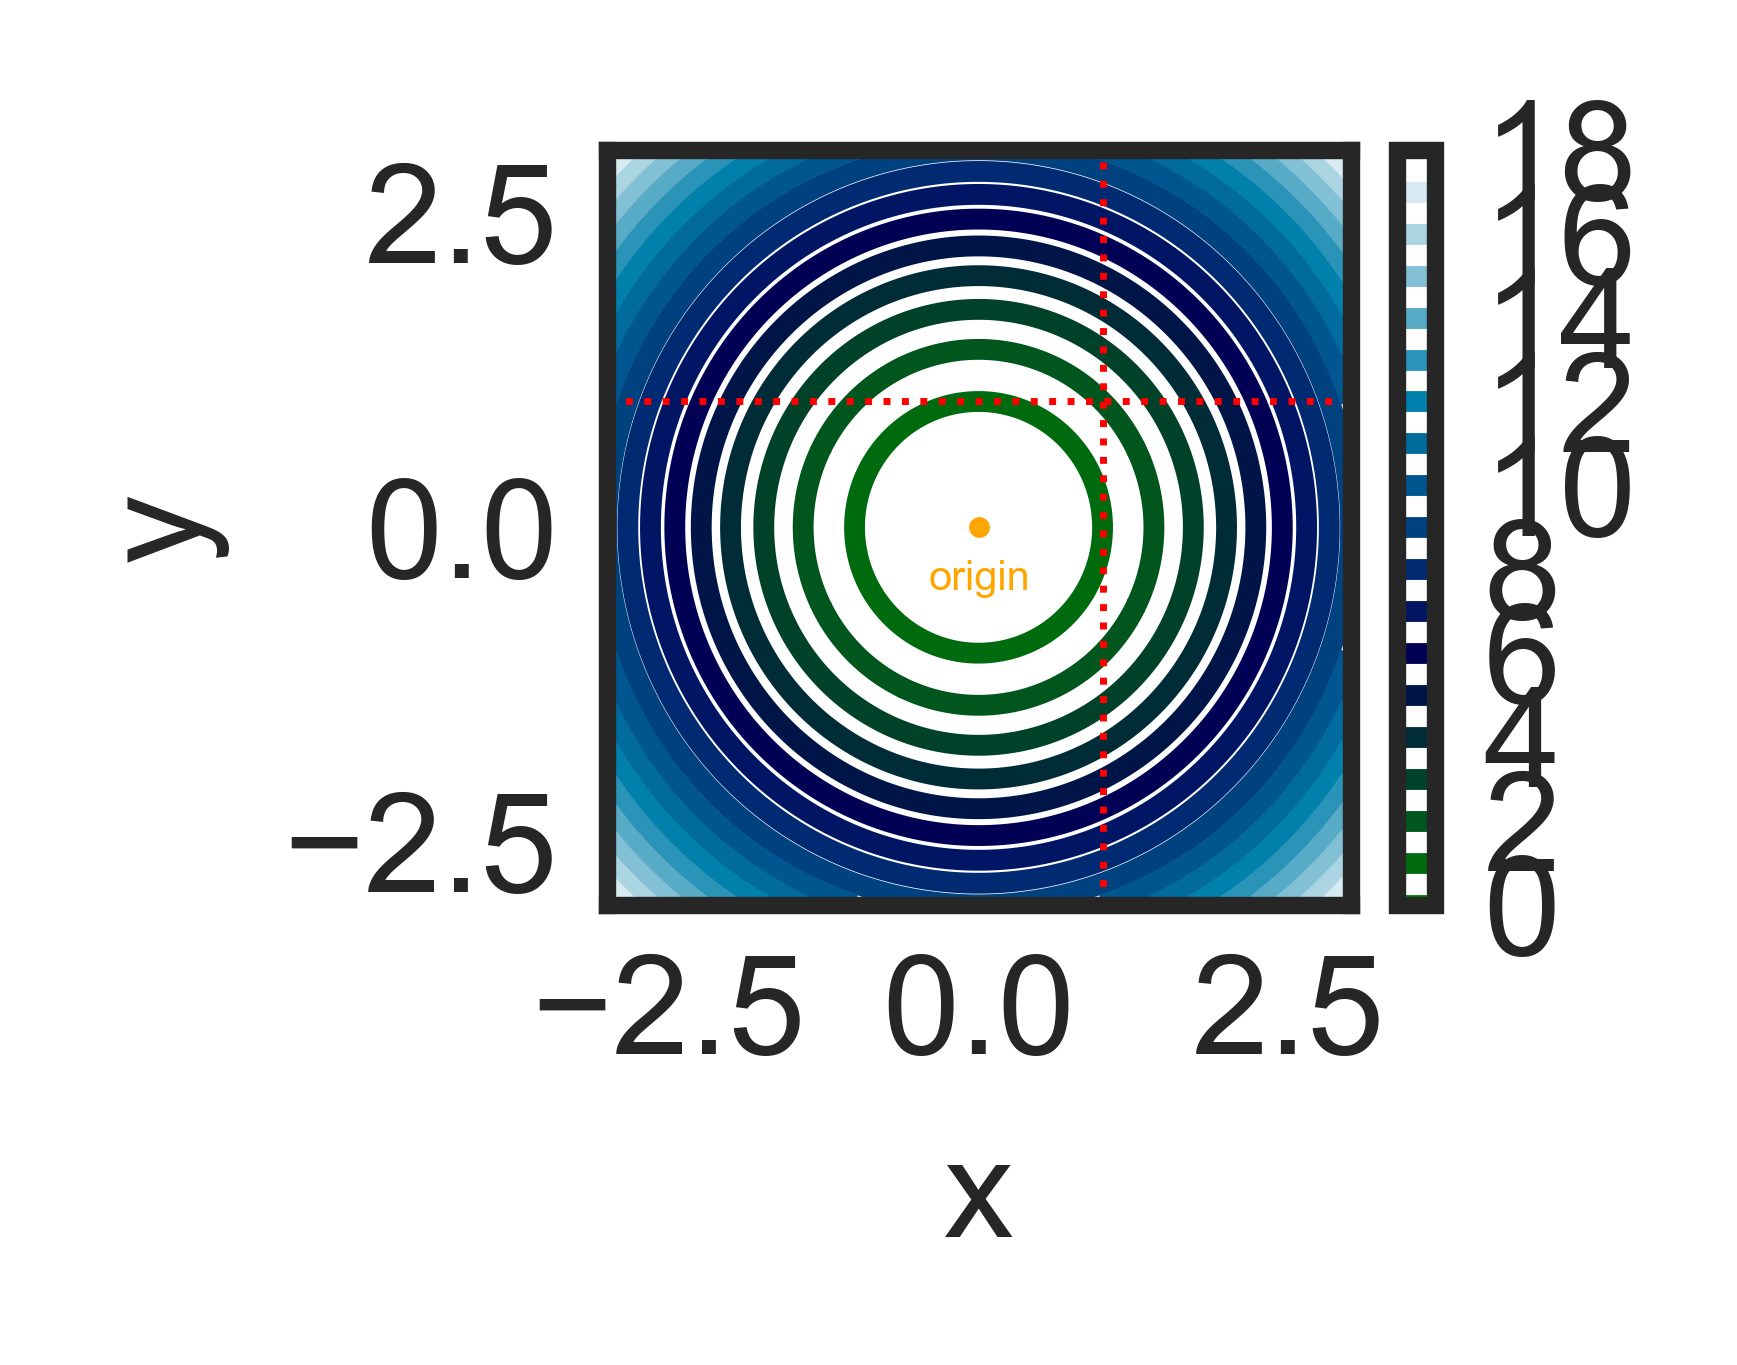

In [215]:
plt.figure(figsize = (1.2, 1), dpi = 1000)
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3 ,1000)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.contour(X, Y, Z, 20, cmap = "ocean")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.axvline(x = 1, color = 'red', linestyle = ':', linewidth = 0.5)
plt.plot(x, x*0 + 1, color = 'red', linestyle = ':', linewidth = 0.5)
plt.plot(0, 0, ".", color = 'orange', markersize = 1)
plt.annotate("origin", xy = (-0.4, -0.5), color = "orange", size = 3)
#z = x^2 + y^2是一个开口向上的子弹头形状的三维图像，x,y是横向的轴，z垂直于x,y。
#z的偏导是：2x, 2y：
#所以当x=0，y=0 时，相应的梯度是0，0，所以这个点属于Stationary point
#当x=1，y=1 时，相应的梯度为2，2, 方向如图所示

i.Answer $$
\begin{pmatrix}
9
\end{pmatrix}
$$

ii.Answer $$
\begin{pmatrix}
0 & 36 & 27\\
0 & 0 & 0\\
0 & 12& 9
\end{pmatrix}
$$

iii.Answer $$
\begin{pmatrix}
0 & 48 & 39\\
0 & 8 & 6\\
0 & 28 & 21
\end{pmatrix}
$$

d. 使用 seaborn 中的 regplot 功能对你在1d中计算的数据进行线性回归。描述你发现的关系并给出可能的原因。

In [ ]:
# 搜索seaborn regplot.

我不会

# 反馈
如果你对这个quiz的难度，预习的进度，以及课程目前以来的任何方面有任何建议或者问题都欢迎写在下面！